## Assignment 1 Homework 3
- GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- Describe the behavior you see in the plots in terms of the law of large numbers.
- PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing

## Extra Credit: FIT a gaussian to the distribution of means            

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


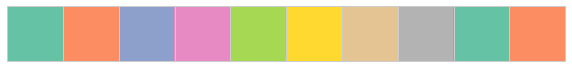

In [1]:
from __future__ import print_function
import numpy as np
import pylab as pl
import seaborn as sns
from scipy.optimize import curve_fit, minimize
    
%pylab inline
sns.set_style('whitegrid')

In [2]:
np.random.seed(999)

## Distributions used

In [3]:
distributions = ['Normal', 'Poisson', 'Binomial', 'Chi-square', 'Laplace']

## and which mean to give it

In [4]:
mean = 150

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

In [5]:
# Empty dictionary for all distributions
dist = {}

In [6]:
for x in distributions:
    dist[x] = {}
    dist[x]['means'] = {}

In [7]:
sizes = np.random.randint(10, 2000, 100)
sizes.shape

(100,)

In [8]:
sizes

array([1482,  358,  879,  491, 1746,  235,  485, 1449,  227,  957, 1562,
       1663,  786,  658,  186, 1615, 1612,   21,   21, 1183,  993,  238,
        772, 1520, 1340,  328,  337,  880, 1947,  712,  495, 1149,  368,
       1022, 1589, 1578,  627,  654,  535,  309,   94, 1106, 1009,  760,
        293, 1980,   33, 1470,   94, 1679,  309,  859, 1001,  774, 1984,
        948, 1012, 1250, 1347,  699,   53, 1291,  244, 1019, 1240,  464,
       1805,  381,  978, 1910,  531,  772, 1397,   88,   26,  457,  649,
        955, 1860,  553,  312, 1086,  726, 1048, 1526, 1082, 1296,  782,
        609, 1869, 1470,  969, 1315, 1269,  129, 1973, 1022,  677,   32,
        382])

In [9]:
p = 0.35

for n in sizes:
    dist['Normal'][n] = np.random.normal(mean, size=n)
    dist['Poisson'][n] = np.random.poisson(mean, size=n)
    dist['Binomial'][n] = np.random.binomial(mean/p, p, size=n)
    dist['Chi-square'][n] = np.random.chisquare(mean, size=n)
    dist['Laplace'][n] = np.random.laplace(mean, size=n)

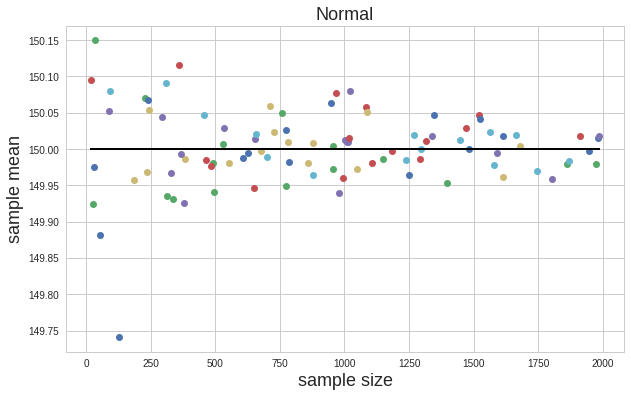

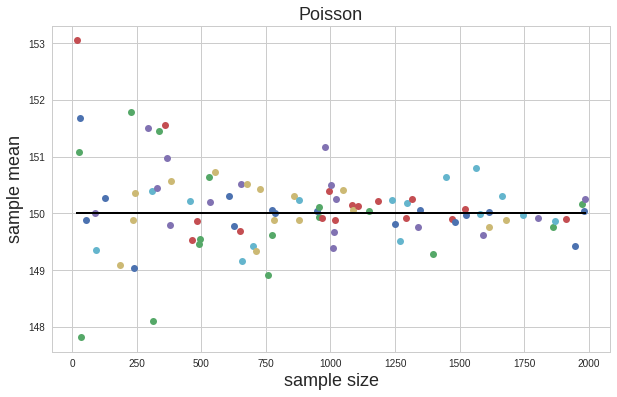

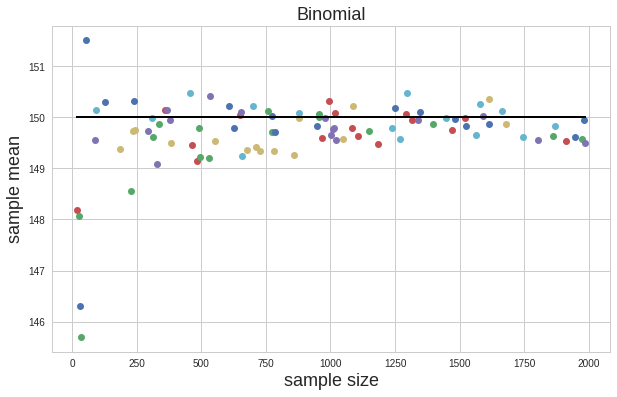

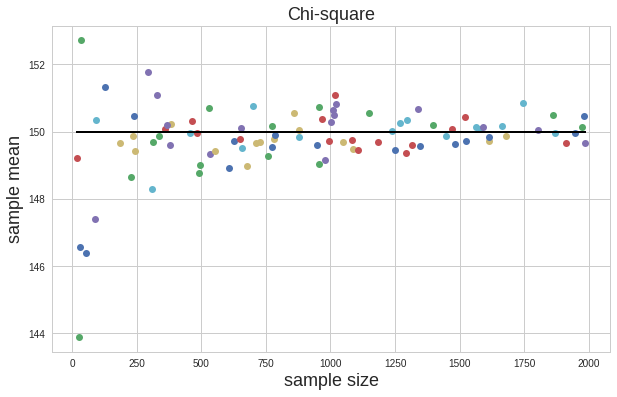

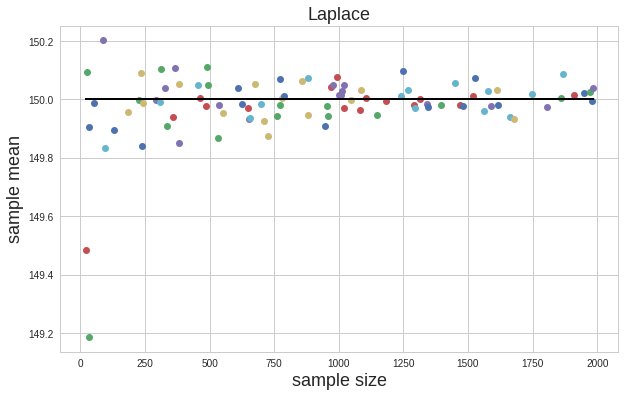

In [10]:
ax = {}

for x in distributions:
    ax[x] = pl.figure(figsize=(10,6)).add_subplot(111)
    for nn in dist[x]:
        if not type(nn) == str:
            dist[x]['means'][nn] = dist[x][nn].mean()
            ax[x].plot(nn, dist[x]['means'][nn], 'o')
            ax[x].set_xlabel('sample size', fontsize=18)
            ax[x].set_ylabel('sample mean', fontsize=18)
            ax[x].set_title(x, fontsize=18)
            ax[x].plot([min(sizes), max(sizes)], [mean, mean], 'k')

### Figure 2: [describe what you see and how it relates to the law of large numbers]

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

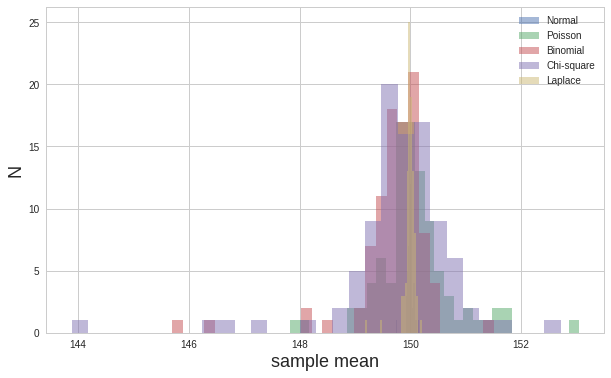

In [11]:
ax_means = pl.figure(figsize=(10,6)).add_subplot(111)

for x in distributions:
    means = list(dist[x]['means'].values())
    ax_means.hist(means, bins=30, alpha=0.5, label=x)
    ax_means.set_xlabel('sample mean', fontsize = 18)
    ax_means.set_ylabel('N', fontsize = 18)
    ax_means.legend()

## Figure 3: [...]